In [1]:
import sys
sys.path.append('../hh_dmft_test')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import matplotlib

In [4]:
matplotlib.rcParams['font.size'] = 16

###  TB-model for Bethe lattice with infinite number of neighbours

In [5]:
from tight_binding import Bethe_lattice as BL

In [6]:
omega = np.linspace(-4,4,1000)
BandWidth = 2.0
bethe = BL(BandWidth, omega)

../hh_dmft_test/tight_binding.py:159: RuntimeWarning: invalid value encountered in sqrt
  self.dos = np.sqrt(4 * self.t ** 2 - w ** 2) / np.pi / 2 / self.t ** 2


Text(0.5, 1.0, 'Density of states')

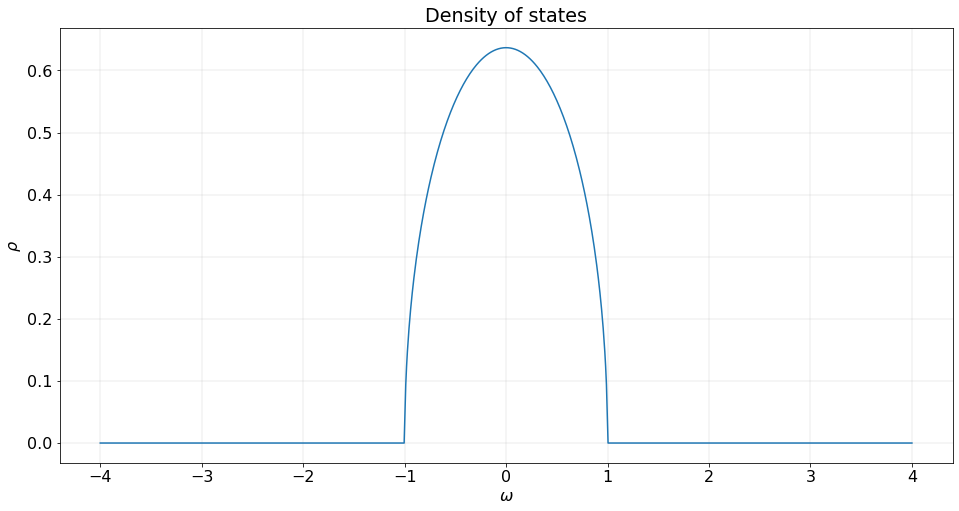

In [7]:
plt.figure(figsize=(16,8))
plt.grid('-.', lw=0.25)
plt.plot(omega, bethe.dos)
plt.ylabel(r'$\rho$')
plt.xlabel(r'$\omega$')
plt.title('Density of states')

### DMFT for Hubbard model
#### Green function in Matsubara frequencies

In [18]:
beta = 40.0
num_iw = 128 #
wn = np.pi * (2 * np.array(range(-int(num_iw / 2), num_iw // 2)) + 1) / beta
U = 2.5 
mu = 0.
g0_initial = bethe.gf_iwn(wn, mu)

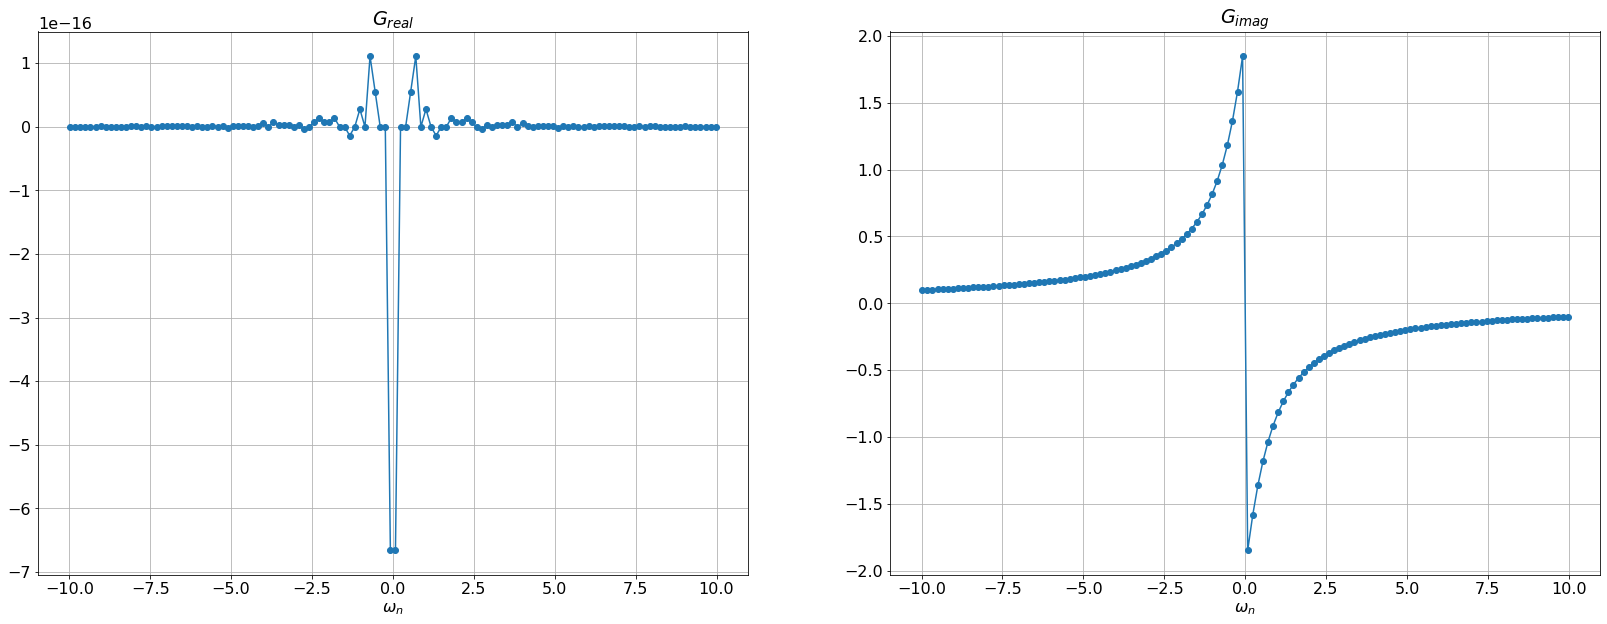

In [19]:
plt.figure(figsize=(28, 10))
plt.subplot(121)
plt.plot(wn, g0_initial.real, '-o')
plt.grid()
plt.xlabel(r'$\omega_{n}$')
plt.title(r'$G_{real}$')
plt.subplot(122)
plt.plot(wn, g0_initial.imag, '-o')
plt.xlabel(r'$\omega_{n}$')
plt.title(r'$G_{imag}$')
plt.grid()

#### CT_INT solver 

In [20]:
import solvers

In [29]:
alpha = 1.0 #
n_loops = 15 # number of DMFT-loops
tol = 0.0001 # convergence accuracy
num = 10 # number of initial vertexes
steps = 1 * 10 ** 7 # number of MC iteraction
p = 1.0 #
delta = 0.51 # 
y = 0. # el-ph coupling constant
w0 = 0.# phonon frequency
pu = 1.0 # probability of hubbard vertex

In [30]:
solver = solvers.QMC_CT_INT(beta=beta, U = U, num=num , g0=g0_initial, num_iw=num_iw, steps= steps, 
                            p=p, delta=delta, y = y, w0 = w0, pu=pu,
                           mu=mu)

In [31]:
from dmft import DMFT

In [32]:
dmft_qmc = DMFT(n_loops, g0_initial, solver, alpha, tol, tb_model=bethe)

In [33]:
dmft_qmc.body()

DMFT Loop : 0 / 15 starts at 2020-02-07 14:27:44.501043
DMFT Loop : 1 / 15 starts at 2020-02-07 15:16:59.499354
DMFT Loop : 2 / 15 starts at 2020-02-07 16:08:10.047917
DMFT Loop : 3 / 15 starts at 2020-02-07 17:45:34.433498
DMFT Loop : 4 / 15 starts at 2020-02-07 19:07:59.482028
DMFT Loop : 5 / 15 starts at 2020-02-07 20:38:07.172675
DMFT Loop : 6 / 15 starts at 2020-02-07 22:13:38.660069
DMFT Loop : 7 / 15 starts at 2020-02-07 23:50:52.525259
DMFT Loop : 8 / 15 starts at 2020-02-08 01:22:10.410780
DMFT Loop : 9 / 15 starts at 2020-02-08 02:53:17.754844
DMFT Loop : 10 / 15 starts at 2020-02-08 04:34:57.733234
DMFT Loop : 11 / 15 starts at 2020-02-08 06:13:42.263972
DMFT Loop : 12 / 15 starts at 2020-02-08 07:43:00.069665
DMFT Loop : 13 / 15 starts at 2020-02-08 09:15:23.093915
DMFT Loop : 14 / 15 starts at 2020-02-08 10:49:51.153987
DMFT Loop : 15 / 15 ends at 2020-02-08 12:27:16.133331


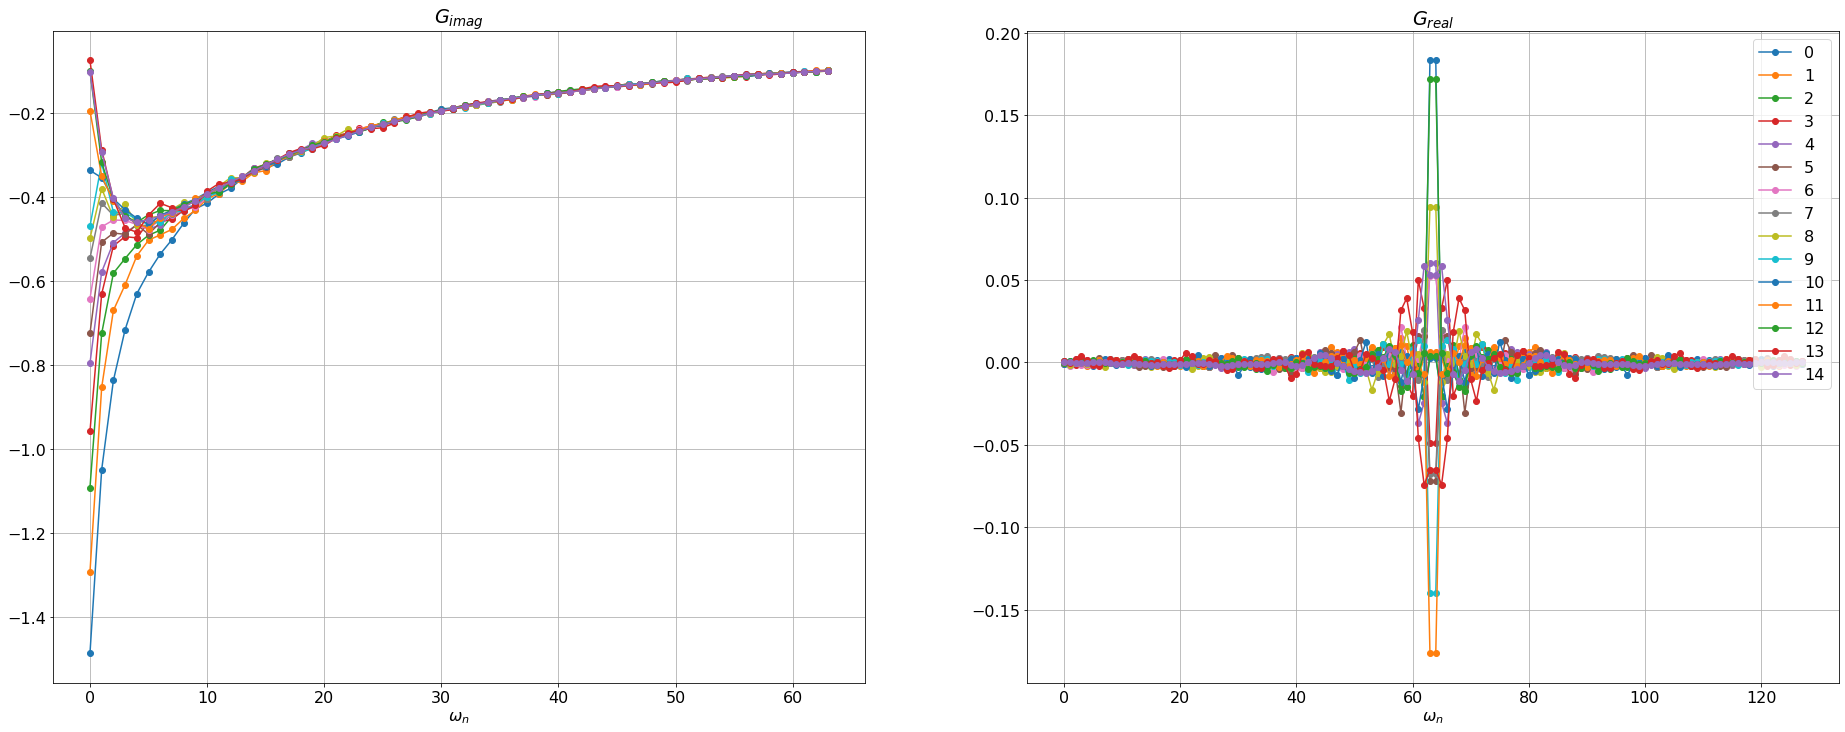

In [37]:
gf_qmc = dmft_qmc.g_list
last_loop = gf_qmc.shape[0] 
plt.figure(figsize=(32,12))
for i in range(last_loop)[:]:
    plt.subplot(121)
    plt.xlabel(r'$\omega_{n}$')
    plt.title(r'$G_{imag}$')
    plt.grid()
    plt.plot(gf_qmc[i].imag[num_iw//2:],'-o', label = i)
    plt.subplot(122)
    plt.xlabel(r'$\omega_{n}$')
    plt.title(r'$G_{real}$')
    plt.grid()
    plt.plot(gf_qmc[i].real,'-o', label = i)
plt.legend()

#### Exact diagonalization 

In [45]:
betaEmax = 10.0 # Max energy level 
minImpact = 0.001 # Cut-off level for wavefunction which contribute into electron density 
full = True # Calculate without cut-off, i.e. whole hamiltonian
mc = 3 # number of electron baths 
n_max = 1 # max number of bosons
U = 2.5  
mu = U / 2 # chemical potential
Vcd = 0 # Hoppings between cluster and baths
ec = 0 # On-site bath energy
gamma_bd = 0.0 # Electron-phonon coupling
w0 = 0.00 # bosons frequency [eV]
delta = 1.0 # 
calc = False # Calculate changed parts of hamiltonian matrix during initialization

solver = solvers.ED(beta=beta, wn=wn, betaEmax=betaEmax, minImpact=minImpact, full=full, 
                    mc = mc, mu = mu, n_max = n_max, Ud = U, Vcd=Vcd, ec=ec,
                    gamma_bd=gamma_bd, eb=w0, delta=delta, calc=False)

In [46]:
dmft_ed = DMFT(n_loops, g0_initial, solver, alpha, tol, tb_model=bethe)
dmft_ed.body()

DMFT Loop : 0 / 15 starts at 2020-02-08 13:32:24.112230
DMFT Loop : 1 / 15 starts at 2020-02-08 13:32:46.440463
DMFT Loop : 2 / 15 starts at 2020-02-08 13:34:54.959085
DMFT Loop : 3 / 15 starts at 2020-02-08 13:36:50.449212
DMFT Loop : 4 / 15 starts at 2020-02-08 13:38:34.997545
DMFT Loop : 5 / 15 starts at 2020-02-08 13:40:28.656947
DMFT Loop : 6 / 15 starts at 2020-02-08 13:42:25.613264
DMFT Loop : 7 / 15 starts at 2020-02-08 13:44:26.716307
DMFT Loop : 8 / 15 starts at 2020-02-08 13:44:57.848446
DMFT Loop : 9 / 15 starts at 2020-02-08 13:46:40.296437
DMFT Loop : 10 / 15 starts at 2020-02-08 13:47:13.364478
DMFT Loop : 11 / 15 starts at 2020-02-08 13:48:09.153403
DMFT Loop : 12 / 15 starts at 2020-02-08 13:52:40.596293
DMFT Loop : 13 / 15 starts at 2020-02-08 13:57:59.113488
DMFT Loop : 14 / 15 starts at 2020-02-08 14:03:15.883838
DMFT Loop : 15 / 15 ends at 2020-02-08 14:06:21.709471


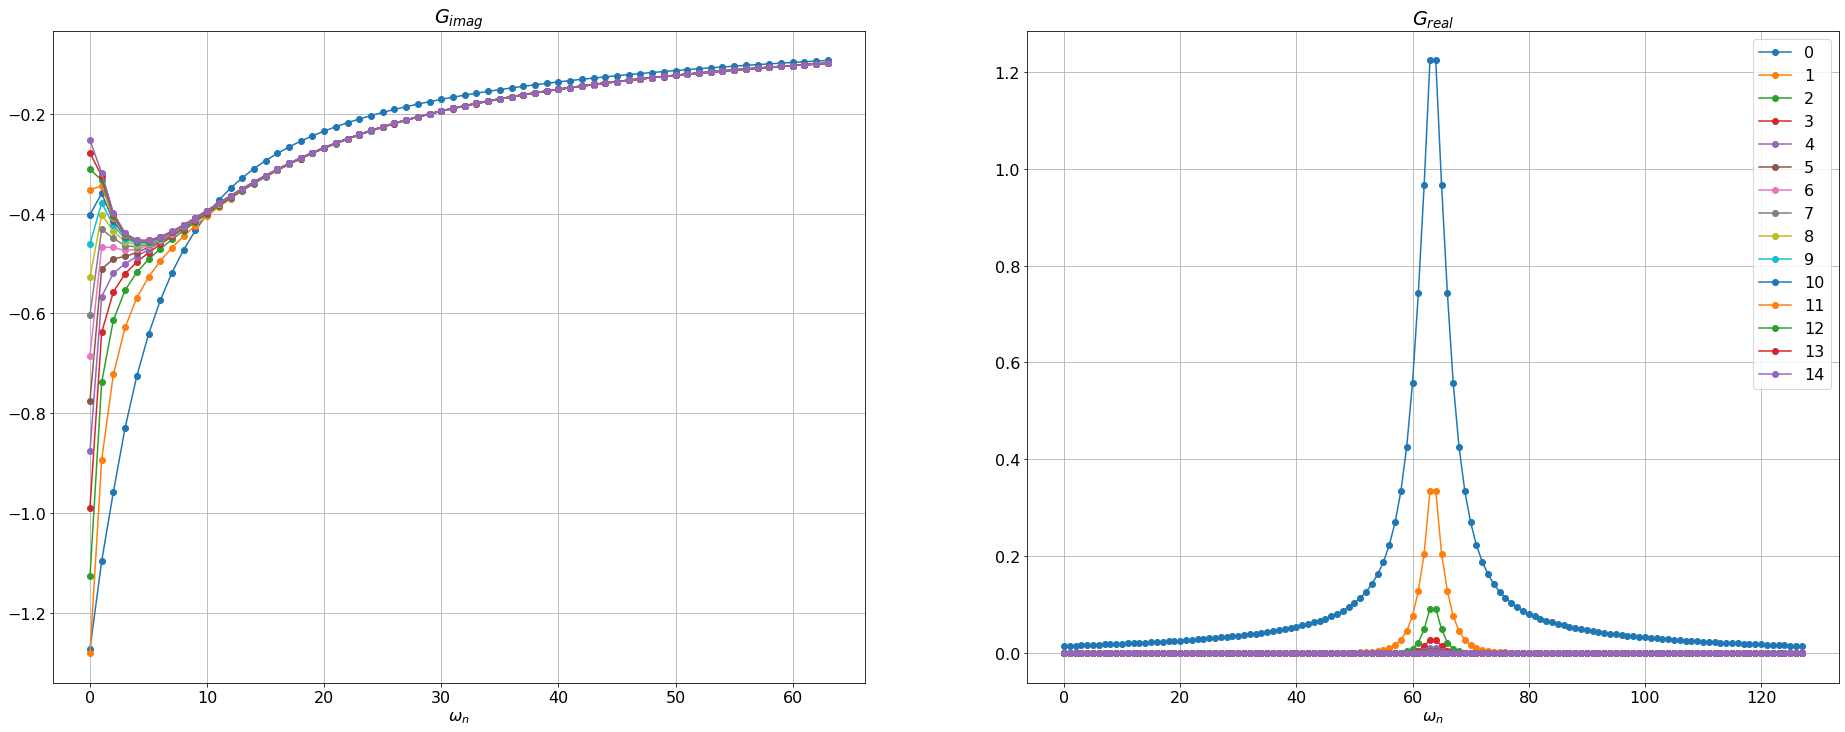

In [48]:
gf_ed = dmft_ed.g_list
last_loop = gf_ed.shape[0] 
plt.figure(figsize=(32,12))
for i in range(last_loop)[:]:
    plt.subplot(121)
    plt.xlabel(r'$\omega_{n}$')
    plt.title(r'$G_{imag}$')
    plt.grid()
    plt.plot(gf_ed[i].imag[num_iw//2:],'-o', label = i)
    plt.subplot(122)
    plt.xlabel(r'$\omega_{n}$')
    plt.title(r'$G_{real}$')
    plt.grid()
    plt.plot(gf_ed[i].real,'-o', label = i)
plt.legend()

#### QMC vs ED

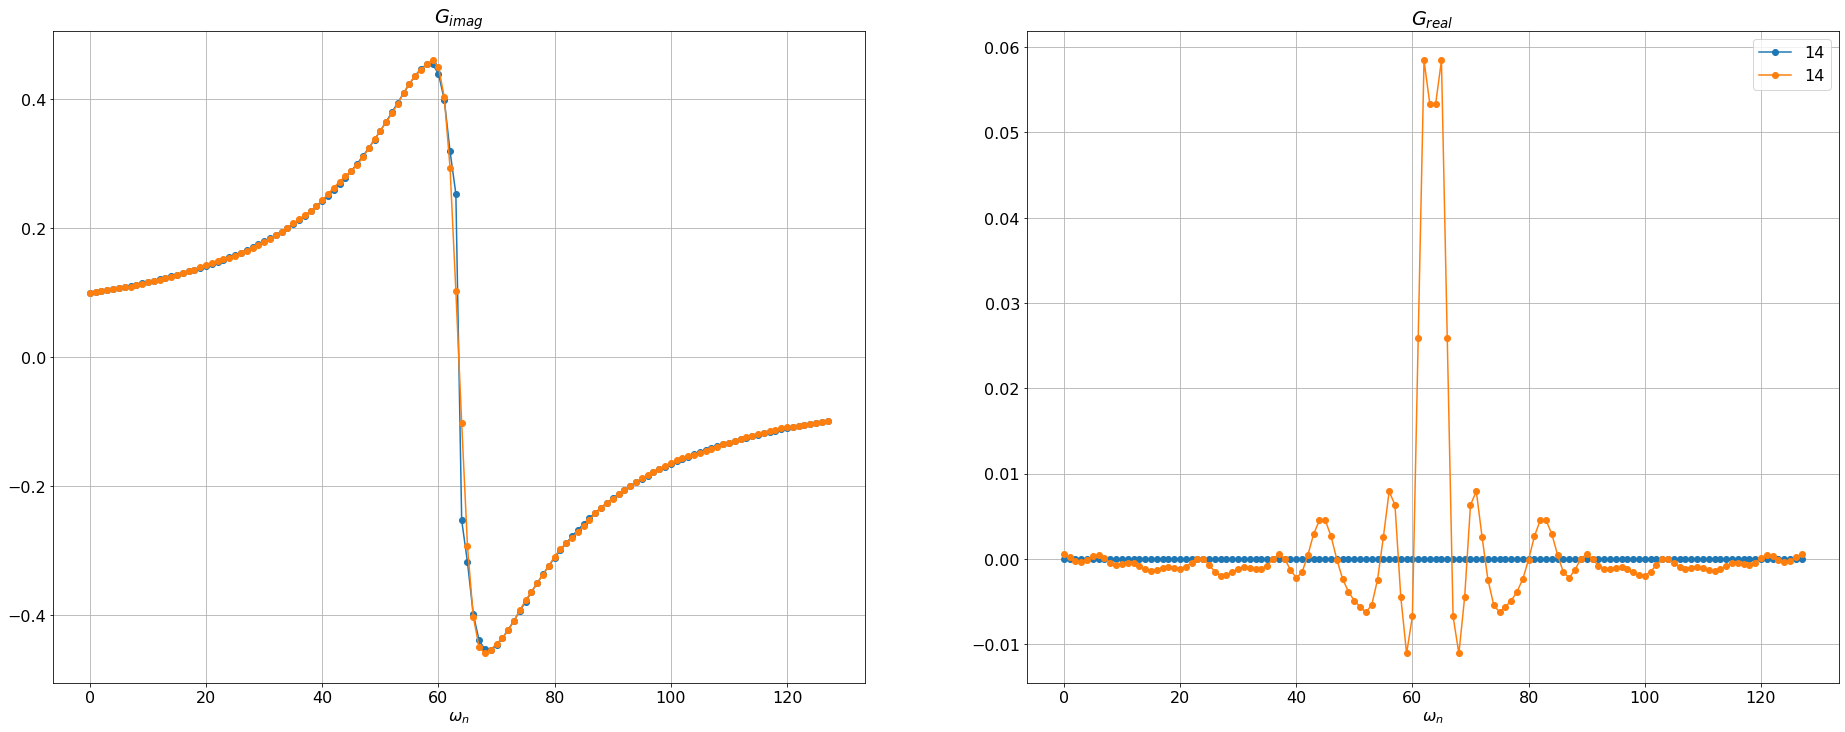

In [52]:
plt.figure(figsize=(32,12))
for i in range(last_loop)[-1:]:
    plt.subplot(121)
    plt.xlabel(r'$\omega_{n}$')
    plt.title(r'$G_{imag}$')
    plt.grid()
    plt.plot(gf_ed[i].imag,'-o', label = i)
    plt.plot(gf_qmc[i].imag,'-o', label = i)
    plt.subplot(122)
    plt.xlabel(r'$\omega_{n}$')
    plt.title(r'$G_{real}$')
    plt.grid()
    plt.plot(gf_ed[i].real,'-o', label = i)
    plt.plot(gf_qmc[i].real,'-o', label = i)
plt.legend()